In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ticker = 'HEROMOTOCO.NS'
data = yf.download(ticker, start='2020-01-01', end='2025-04-06')
data = data[['Close']].dropna()
data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,HEROMOTOCO.NS
Date,
2020-01-01,2080.927979
2020-01-02,2078.275879
2020-01-03,2080.756592
2020-01-06,2025.836792
2020-01-07,2008.642334
...,...
2025-03-28,3722.949951
2025-04-01,3762.050049


In [3]:

monthly_data = data.resample('M').last()
monthly_data

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_5992/1781132388.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').last()


Price,Close
Ticker,HEROMOTOCO.NS
Date,
2020-01-31,2140.210938
2020-02-29,1804.958862
2020-03-31,1404.423706
2020-04-30,1906.082153
2020-05-31,2076.879395
...,...
2024-12-31,4058.762939
2025-01-31,4232.942383


In [4]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

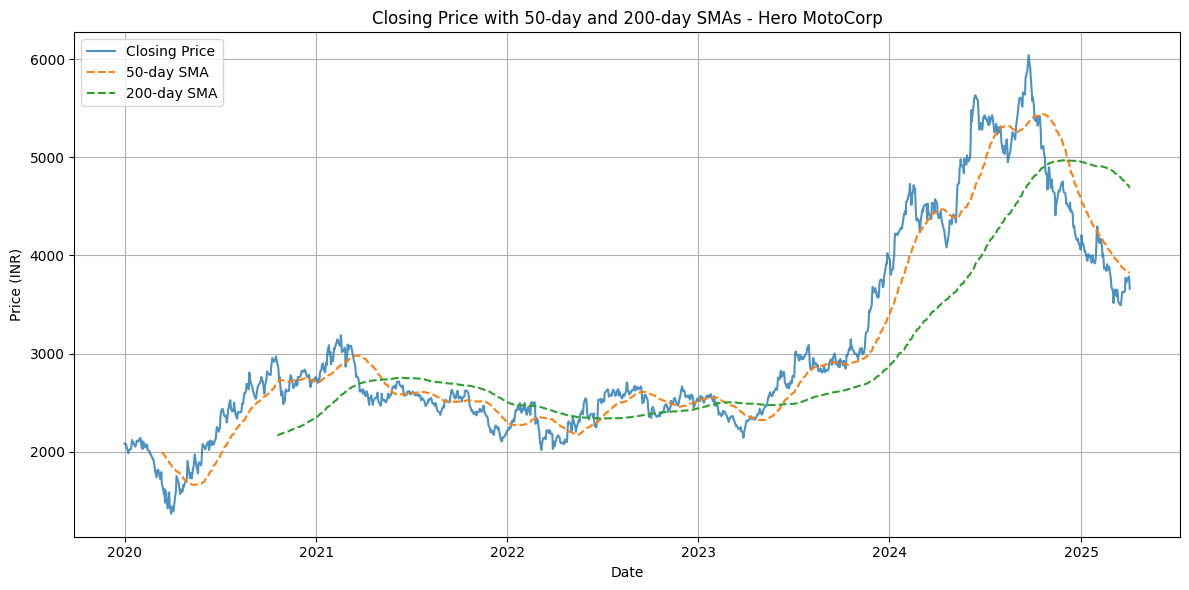

In [5]:
# Plot 1: Closing Price with SMAs
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price', alpha=0.8)
plt.plot(data['SMA_50'], label='50-day SMA', linestyle='--')
plt.plot(data['SMA_200'], label='200-day SMA', linestyle='--')
plt.title('Closing Price with 50-day and 200-day SMAs - Hero MotoCorp')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility_30d'] = data['Daily_Return'].rolling(window=30).std()
data['Cumulative_Return'] = (1 + data['Daily_Return']).cumprod()

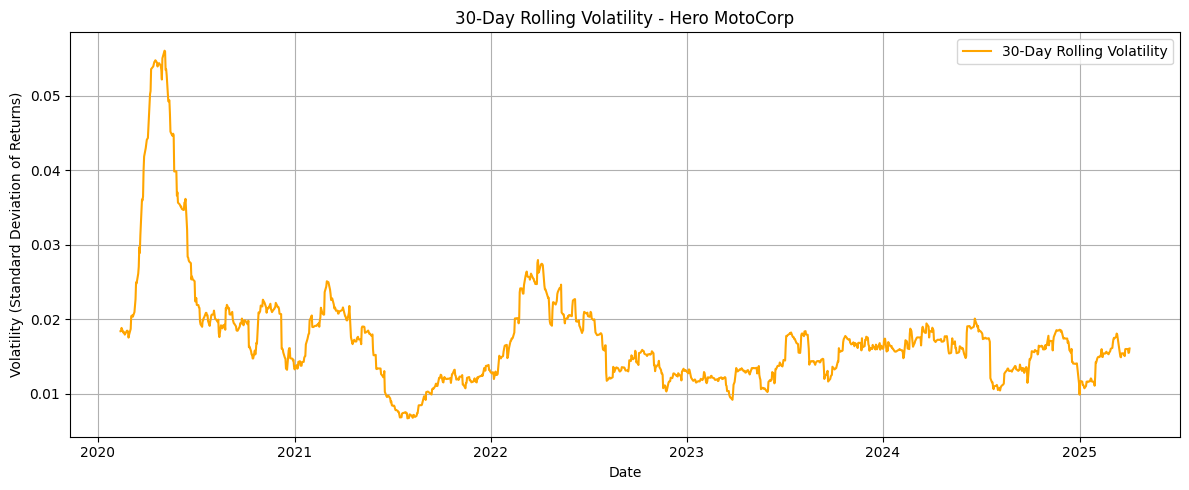

In [7]:
# Plot: 30-Day Rolling Volatility
plt.figure(figsize=(12, 5))
plt.plot(data['Volatility_30d'], label='30-Day Rolling Volatility', color='orange')
plt.title('30-Day Rolling Volatility - Hero MotoCorp')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation of Returns)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

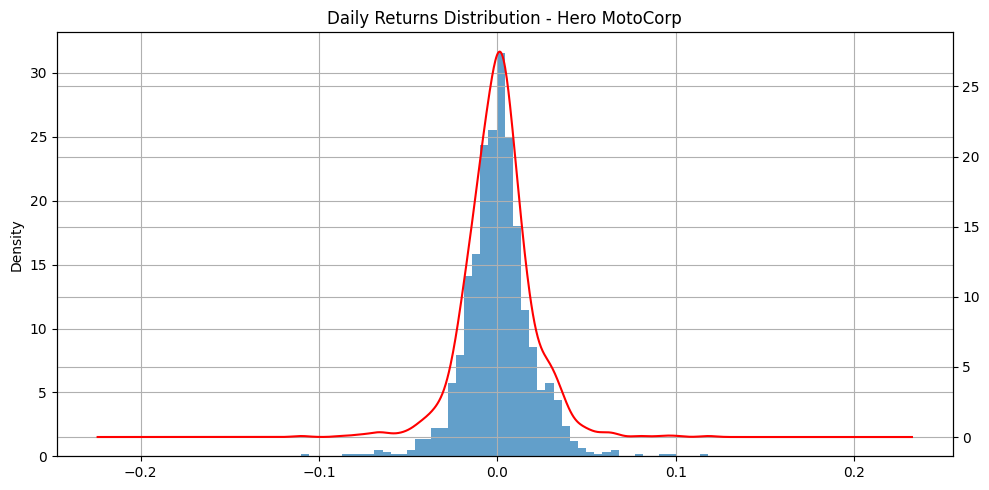

In [8]:
# Plot 2: Daily Returns Distribution
plt.figure(figsize=(10, 5))
data['Daily_Return'].hist(bins=50, alpha=0.7, density=True)
data['Daily_Return'].plot(kind='kde', secondary_y=True, color='red')
plt.title('Daily Returns Distribution - Hero MotoCorp')
plt.xlabel('Daily Return')
plt.grid()
plt.tight_layout()
plt.show()

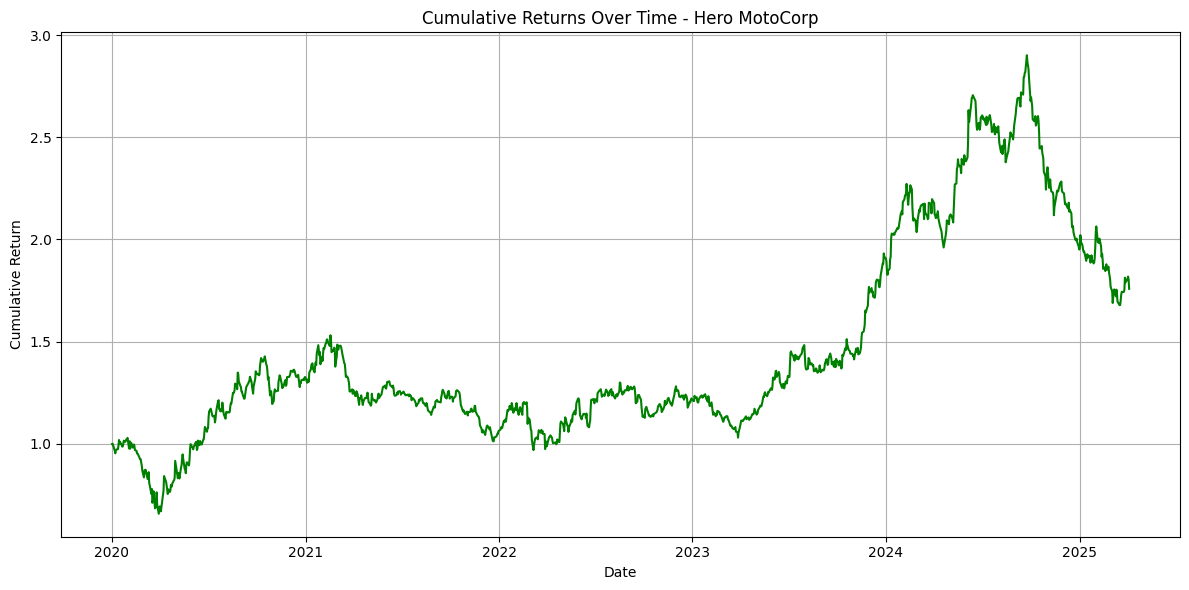

In [9]:
# Plot 3: Cumulative Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Return'], label='Cumulative Return', color='green')
plt.title('Cumulative Returns Over Time - Hero MotoCorp')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid()
plt.tight_layout()
plt.show()

In [10]:
# Step 2D: RSI (14-day)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

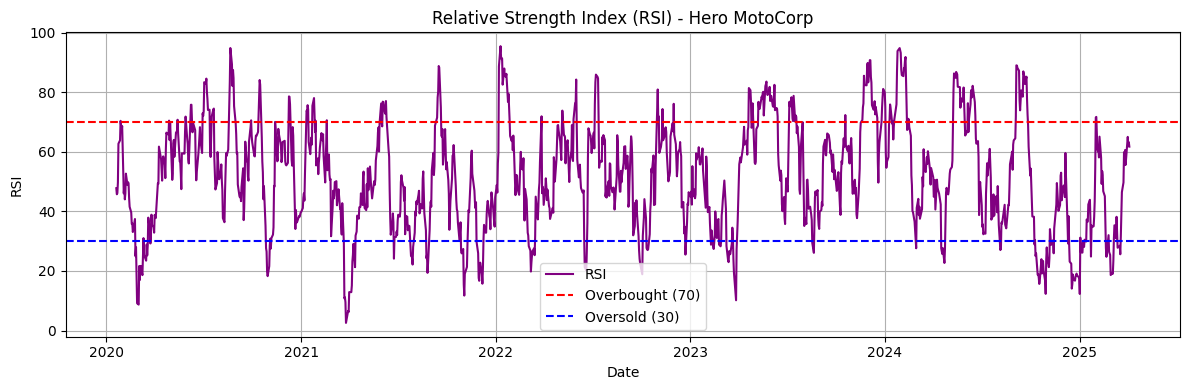

In [11]:
# Plot 4: RSI Trend
plt.figure(figsize=(12, 4))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='blue', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) - Hero MotoCorp')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [12]:
# Step 2E: Bollinger Bands
data['Rolling_Mean_20'] = data['Close'].rolling(window=20).mean()
data['Rolling_STD_20'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['Rolling_Mean_20'] + (2 * data['Rolling_STD_20'])
data['Lower_Band'] = data['Rolling_Mean_20'] - (2 * data['Rolling_STD_20'])

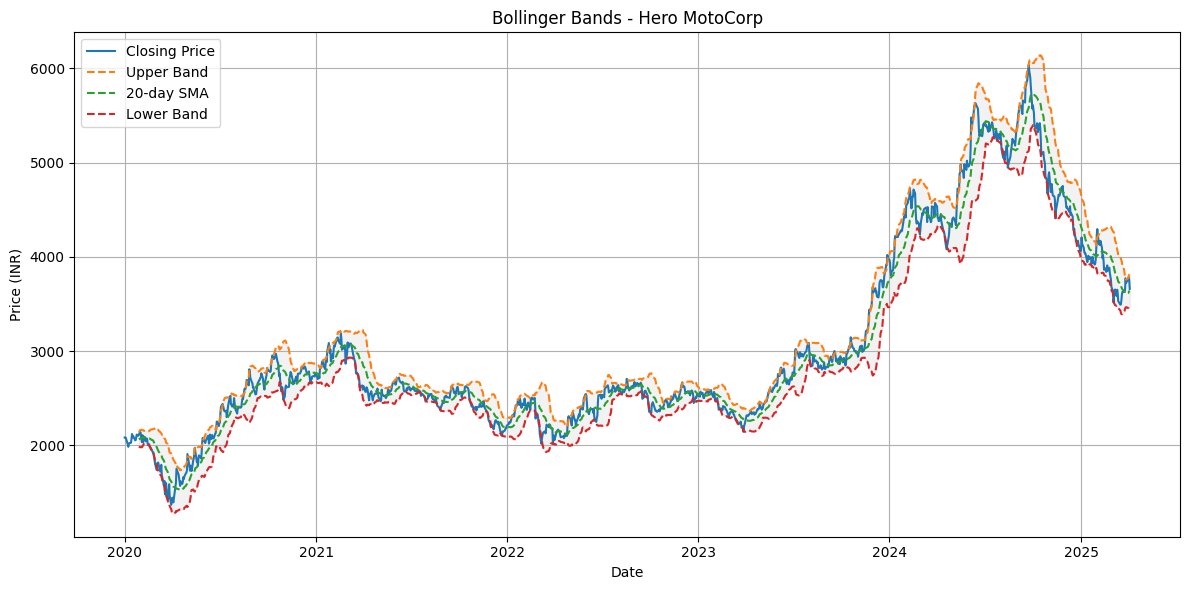

In [13]:
# Plot 5: Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['Upper_Band'], label='Upper Band', linestyle='--')
plt.plot(data['Rolling_Mean_20'], label='20-day SMA', linestyle='--')
plt.plot(data['Lower_Band'], label='Lower Band', linestyle='--')
plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='gray', alpha=0.1)
plt.title('Bollinger Bands - Hero MotoCorp')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()